## CNNs & Transfer Learning: Yoga Asana Classification  🧘‍♀️

##### Data Science Project 4
##### Author: Redacted

###  Introduction

Technology innovations are happening at a drastic rate and provide a means of enriching day-to-day human life. The influence of these innovations is present in the health care and related industries. Apart from standard medical practices, other practices such as Yoga, Pilates, martial arts, etc are also known means of achieving good health and fitness.  

Yoga is an ancient practice that involves physical poses, concentration, deep breathing and mindfulness. This notebook aims to combine image processing, computer vision and deep learning techniques to  determine whether a set of yoga asanas (poses) can be identified from images. 

Inspired by a [SJSU Master's Theses](https://scholarworks.sjsu.edu/cgi/viewcontent.cgi?article=1932&context=etd_projects), this notebook explores a technology-driven Yoga practice. A tool such as this may help existing "at-home yoga" apps to create yoga routines from a sequence of images or frames in a video. This will allow instructors to take images/videos of themselves during a yoga flow so that it can be converted to a routine automatically. 

Since this exploration is an image classifaction problem at its core, the dataset consists of images from 5 sets of commonly-used yoga poses, namely "Downward dog" (Adho Mukha Svanasana), "Goddess" (Utkata Konasana), "Plank" (Phalakasana), "Tree" (Vrksansana) and "Warrior II" (Virabhadrasana).

![Yoga Asanas](../report/images/poses.png "Yoga Asanas")

The implementation managed to correctly identify yoga ansas from the images with varying levels of accuracy depending on which neural network was used to train the dataset. At first, a CNN was built from scratch. Since there was a large difference between the training and testing accuracy, it was optimised to minimise dropout. After this, a Transfer Learning approach was followed using a pretrained model. 

### Pipeline Overview

The outcome of the notebook was achieved by working through the entire data science pipeline. 

1. **Ask a question:** what industry can benefit from data science related technologies? The holistic health industry? Specifically for practices such as yoga?

2. **Obtain data:** a pre-existing dataset was found containing a set of training and testing images for yoga poses. Some of the images in the dataset were redundent and were replaced by images found via Google Image Search.

3. **Understand the data:** the images were differet sizes, different resolutions and different formats eg. .jpg, .png, .bmp. Each subfolder in the training and testing sets contained images of the specified pose. There was great variation among images. Images were taken in different lighting, with different backgrounds, with varying people in the image, with single and multiple people in the images etc. Some images were photographs, some were frames from a video and some were digitial illustrations. Variation in training data is essential to ensure that the model does not generalise irrelevent featues during training which may produce inaccurate results.

4. **Process & Analyse:** the aim was to compare the performance of various classification models. There are two sets of models: the CNN trained from scratch and the pretrained CNN.
At first, the model trained from scratch is fit on the data. In the first iteration, the CNN built from scratch was not perfoming very well. Adjustments were made to the model and trained again, providing better results. After this model was implemented, the the pretrained model was trained on the data and results were obserbed and parameters were adjusted as needed. This part of the pipeline may be repeated until the results are substatial. 

5. **Reports, Decisioins, Solutions & Conclusions:** there was a comparison made between the results achieved by the different models to determine which is best for classifying the images. More so, the extent to which the models solve the classification problem is discussed.  


### Data Used & Data Preparation

The images were taken from a pre-existing [Yoga Poses Dataset]([https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset). This dataset was modified to remove redundent and duplicates images. This dataset was merged with images scraped from Google Image Search using the [google-images-download
](https://github.com/Joeclinton1/google-images-download) Python package.  This was to ensure that there was an adaquete amount of training data, totalling to 1540 images (roughly about 33% of the dataset came from the Google Image Search scraping).

Image processing had to be done on the dataset before the images could be applied to any of the models. This involves cropping all the images to squares and all resizing them to 224px x 224px. Most pretrained model were trained with images of this resolution, thus it was decided that all models in this set would be trained with the same data to ensure that a fair comparison can be made between the models. It is also important to note that images of a larger size may result in longer training times and require more device memory, on the other hand, images that are resized to a size that is too small may result in loss of information due to low resolution. 

In [1]:
 # import module containing packages and functions not shown in notebook
import sys
sys.path.insert(1, '../src/')
from modules import *

In [ ]:
# preprocessing: crop an resize images in dataset 
crop('train') 
crop('test')

### Methodology

#### Training a CNN from scratch
The first model consisted of using [Tensorflow's Keras](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjm54TIjJr7AhXHilwKHQj2C_IQFnoECBQQAQ&url=https%3A%2F%2Fwww.tensorflow.org%2Fapi_docs%2Fpython%2Ftf%2Fkeras&usg=AOvVaw3HXZSK5ZG960UXLnkVIUjN) module to build a convolutional neural network (CNN) to classify the images. [A Convolutional Neural Network](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) is a deep learning algorithm which can take in an input image, assign learnable weights and biases to various features in the image and be able to differentiate one from the other i.e. classify the image. The nework is made from different layers: the input layer which takes in the image input, hidden layers an output layer. The type and the amount of hidden layers depends on the nature of the problem.  

##### Version 0.0
The first version of the CNN contained and input layer, three convolution stages and a fully-connected output layer. Each convolution stage consisted of a convolution layer, an activation layer, a batch normalisation layer and a max pooling layer. The purposes of the convolution stage layers are as follows:

- **Convolution Layer:** main building block of a CNN and transforms the input in order to extract features from it. It contains a set of filters, parameters of which are to be learned throughout the training. The default kernel size used was 3x3.
- **Activation Layer:** decides whether a neuron  should be activated or not. The default activation function used is `activation='relu'` except for in the last layer where `activation='softmax'` is used. 
- **Batch Normalisation Layer:** standardizes the inputs to a layer for each mini-batch
- **Max Pooling Layer:**  convolution process where the kernel extracts the maximum value of the area it convolve during to convolution stage

The **batch size** (the number of samples that will be propagated through the network), the **learning rate** (controls how much the weights of the network are adjusted with respect the loss gradient) and the number of **epochs** (the number times that the learning algorithm will work through the entire training set) were adjustable parameters for this model. They were set to the following: 
 - `BATCH_SIZE = 32`
 - `learning_rate=0.0001`
 - `n_epochs = 30`

##### Set up data for model Version 0.0

In [2]:
classes = sorted(os.listdir('../data/train'))[:5] # read class names from directories

train_generator = ImageDataGenerator()
traingen = train_generator.flow_from_directory('../data/train', target_size=(224, 224), class_mode='categorical')

validgen = train_generator.flow_from_directory('../data/test', target_size=(224, 224))

Found 1540 images belonging to 5 classes.
Found 468 images belonging to 5 classes.


##### Build CNN for Version 0.0

In [14]:
model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Activation('relu')) # activation
model.add(BatchNormalization()) # batch normalisation
model.add(MaxPooling2D((2,2)))  # max pooling

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Activation('relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_3 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)     

##### Train Version 0.0 Model

In [15]:
%%time

# parameters
BATCH_SIZE = 32
learning_rate=0.0001
n_epochs = 30

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

optimizer = RMSprop(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='version0.0_model.hdf5', verbose=1, save_best_only=True)

# early stopping: stop training once the model performance stops improving on the validation dataset
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

# fitting of the model
history = model.fit(traingen,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer],
                    verbose=1
                   )

Epoch 1/30


2022-11-06 18:31:48.866909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - ETA: 0s - loss: 5.4112 - accuracy: 0.6200

2022-11-06 18:32:29.775628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 2.44476, saving model to version0.0_model.hdf5
48/48 [==============================] - 46s 943ms/step - loss: 5.4112 - accuracy: 0.6200 - val_loss: 2.4448 - val_accuracy: 0.3750
Epoch 2/30
48/48 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.9045
Epoch 2: val_loss improved from 2.44476 to 1.28604, saving model to version0.0_model.hdf5
48/48 [==============================] - 44s 923ms/step - loss: 0.3915 - accuracy: 0.9045 - val_loss: 1.2860 - val_accuracy: 0.6317
Epoch 3/30
48/48 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9602
Epoch 3: val_loss did not improve from 1.28604
48/48 [==============================] - 49s 1s/step - loss: 0.1660 - accuracy: 0.9602 - val_loss: 1.3669 - val_accuracy: 0.6674
Epoch 4/30
48/48 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9682
Epoch 4: val_loss did not improve from 1.28604
48/48 [==============================] - 54s 1s/step -

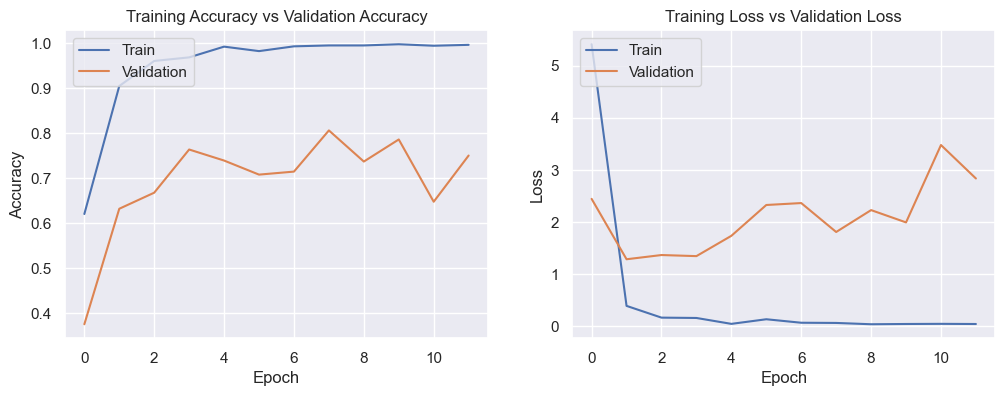

In [16]:
plot_history(history) # plot training accuracies and loss

In the figure on the left above, it is clear that there is a fairly large gap between the training accuracy and the validation accuracy where the max of the training accuracy is about 99% and that of the validation is about 79%. This poor performance on the validation data could indicate that the model is overfitting. 

##### Run Version 0.0 on testing data

In [17]:
# run model on test data
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

test_generator = ImageDataGenerator()

testgen = test_generator.flow_from_directory('data/test',target_size=(224, 224),  batch_size=1, class_mode=None, shuffle=False)

model.load_weights('version0.0_model.hdf5')
filenames = testgen.filenames
true_classes = testgen.classes
predicted_classes = model.predict_generator(testgen)
predicted_classes = np.argmax(predicted_classes, axis=1)

Found 468 images belonging to 5 classes.


/var/folders/8n/_xj0xjm95s3g48ss2m71f1gm0000gn/T/ipykernel_22618/2004872755.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_classes = model.predict_generator(testgen)
2022-11-06 18:42:40.015640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


##### Evaluate Version 0.0's Performance

In [18]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 63.46%


,Precision,Recall,F-Score,Support
downdog,0.652542,0.793814,0.716279,97.0
tree,0.928571,0.565217,0.702703,69.0
plank,0.846154,0.573913,0.683938,115.0
warrior2,0.515152,0.794393,0.625000,107.0
goddess,0.461538,0.375000,0.413793,80.0


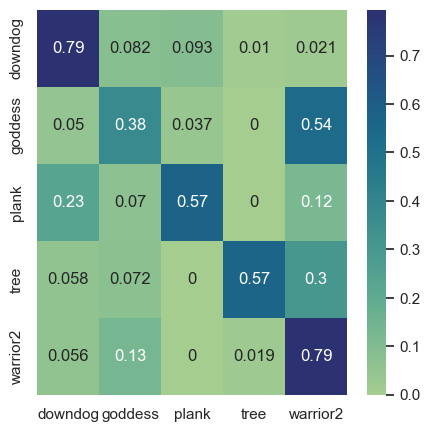

In [19]:
plot_confusion_matrix(true_classes, predicted_classes,  class_indices.values())

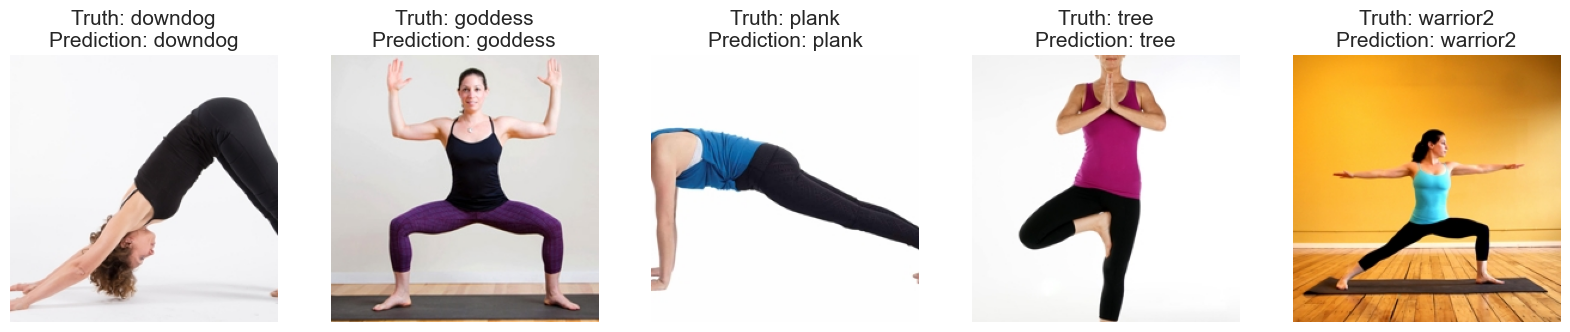

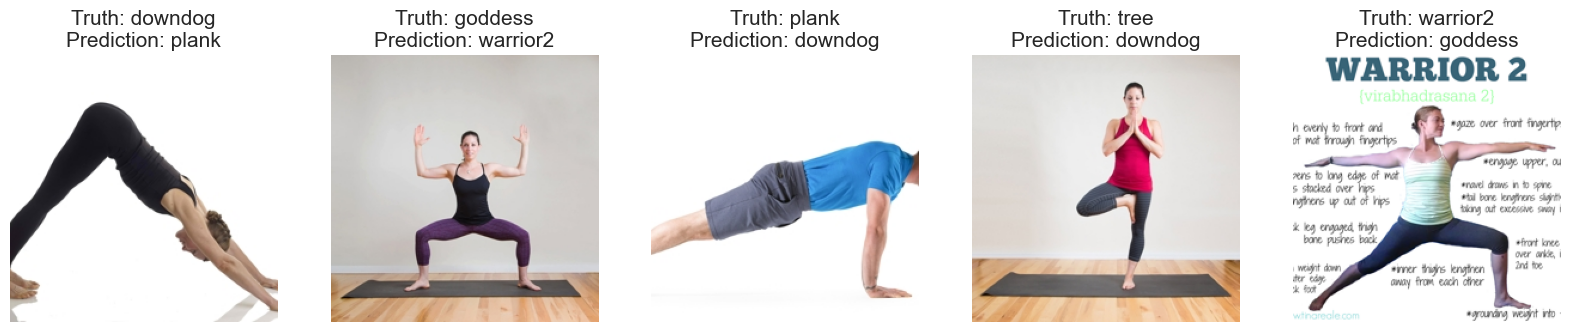

In [20]:
# plot correct and incorrect predictions
plot_correct_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))
plot_incorrect_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))

*Version 0.0* achieved an training accuracy of 99.67% and a test accuracy of 63,62%. The fairly large different in accuracies could be due to overfitting. This occurs when the model aligns with the training data too closely and learns the detail and noise, generalising features incorrectly. This can be due to lack of training data. Although images were scraped to increase the size of the dataset, a dataset of 1594 images is still relatively small. 

*Version 1.0* addresses the overfitting issues that *Version 0.0* faces. There are methods of addressing overfitting in a model (apart from aquiring more data). This includes augmenting the data, such as left-right flipping them. In addition to this, a dropout layer can be added to the CNN. A dropout layer randomly selects neurons which are to be ignored during training. This layer was added to each convolution stage as well as to the output layer. In addition to these adjustments, another convolution stage was added to *Version 1.0* with a convolution filter size of 5x5 in an attempt to futher increase the performance.

In [ ]:
# flip training images to create more data
flip()

##### Set up model for Version 1.0

In [3]:
classes = sorted(os.listdir('../data/train'))[:5] # read class names from directories
train_generator = ImageDataGenerator()
traingen = train_generator.flow_from_directory('../data/train_flipped', target_size=(224, 224), class_mode='categorical')
validgen = train_generator.flow_from_directory('../data/test', target_size=(224, 224))

Found 3080 images belonging to 5 classes.
Found 468 images belonging to 5 classes.


As mentioned, a dropout layer will be added tp each convolution stage in Version 1.0's CNN. There is a dropout parameter which can be adjusted where 1.0 means no dropout and 0.0 means no outputs. It has been set to `dropout_value = 0.3`.

In [13]:
# build CNN for Version 1.0

dropout_value = 0.3 # <--- dropout parameter
model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', input_shape=(224, 224, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Activation('relu')) # activation
model.add(BatchNormalization()) # batch normalisation
model.add(MaxPooling2D((2,2)))  # max pooling
model.add(Dropout(dropout_value)) # <--- dropout layer added

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Activation('relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(dropout_value)) # <--- dropout layer added

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(dropout_value)) # <--- dropout layer added

# ** additional convolution stage added ** 
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(dropout_value)) # <--- dropout layer added


#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(dropout_value)) # <--- dropout layer added
model.add(Dense(len(classes), activation='softmax'))

model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 activation_8 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 112, 112, 32)     

##### Train Version 1.0 Model

In [14]:
%%time
# parameters
BATCH_SIZE = 32
learning_rate=0.0001
n_epochs = 30

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

optimizer = RMSprop(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='version1.0_model.hdf5', verbose=1, save_best_only=True)

# early stopping: stop training once the model performance stops improving on the validation dataset
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')

# fitting of the model
history = model.fit(traingen,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer],
                    verbose=1
                   )

Epoch 1/30


2022-11-06 20:04:54.487462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 2.6883 - accuracy: 0.4403

2022-11-06 20:06:03.362608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.74761, saving model to version1.0_model.hdf5
96/96 [==============================] - 73s 750ms/step - loss: 2.6883 - accuracy: 0.4403 - val_loss: 0.7476 - val_accuracy: 0.7277
Epoch 2/30
96/96 [==============================] - ETA: 0s - loss: 1.1041 - accuracy: 0.6598
Epoch 2: val_loss did not improve from 0.74761
96/96 [==============================] - 74s 774ms/step - loss: 1.1041 - accuracy: 0.6598 - val_loss: 1.0799 - val_accuracy: 0.6875
Epoch 3/30
96/96 [==============================] - ETA: 0s - loss: 0.7868 - accuracy: 0.7667
Epoch 3: val_loss did not improve from 0.74761
96/96 [==============================] - 73s 758ms/step - loss: 0.7868 - accuracy: 0.7667 - val_loss: 1.0380 - val_accuracy: 0.7254
Epoch 4/30
96/96 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.8281
Epoch 4: val_loss did not improve from 0.74761
96/96 [==============================] - 72s 748ms/step - loss: 0.5529 - accuracy: 0.8281 - va

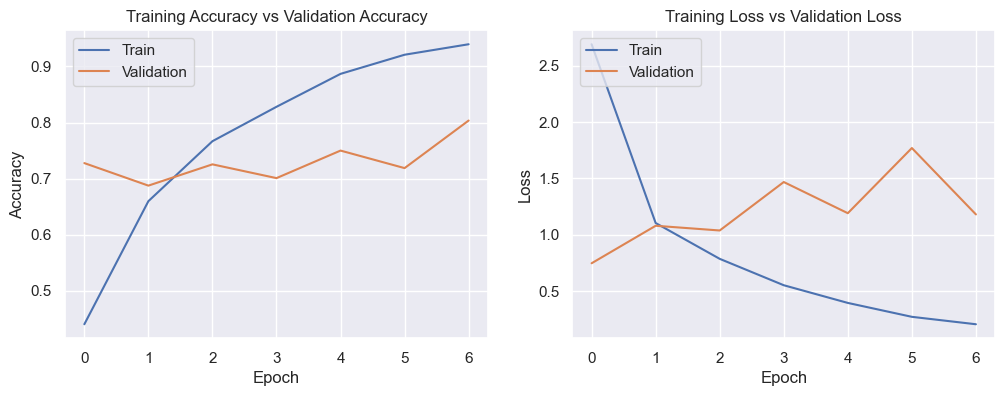

In [15]:
plot_history(history) # plot training accuracies and loss

Similar to Version 0.0, there is still a gap between the trainingg and validation accuracies, however, Version 1.0 has managed to decrease the size of the gap. The maximum training accuracy is around 99% and the maximum validation accuracy around 82%.

##### Run Version 1.0 model on test data

In [18]:
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

test_generator = ImageDataGenerator()

testgen = test_generator.flow_from_directory('../data/test',target_size=(224, 224),  batch_size=1, class_mode=None, shuffle=False)

model.load_weights('version1.0_model.hdf5')
filenames = testgen.filenames
true_classes = testgen.classes
predicted_classes = model.predict_generator(testgen)
predicted_classes = np.argmax(predicted_classes, axis=1)

Found 468 images belonging to 5 classes.


/var/folders/8n/_xj0xjm95s3g48ss2m71f1gm0000gn/T/ipykernel_25262/2475828288.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_classes = model.predict_generator(testgen)
2022-11-06 20:31:21.160148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


##### Evaluate Version 1.0's Performance

In [19]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 73.50%


,Precision,Recall,F-Score,Support
tree,0.893939,0.855072,0.874074,69.0
plank,0.808696,0.808696,0.808696,115.0
warrior2,0.689655,0.747664,0.717489,107.0
downdog,0.789474,0.618557,0.693642,97.0
goddess,0.547368,0.650000,0.594286,80.0


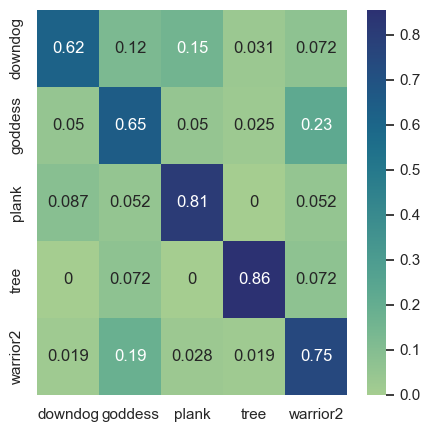

In [20]:
plot_confusion_matrix(true_classes, predicted_classes,  class_indices.values())

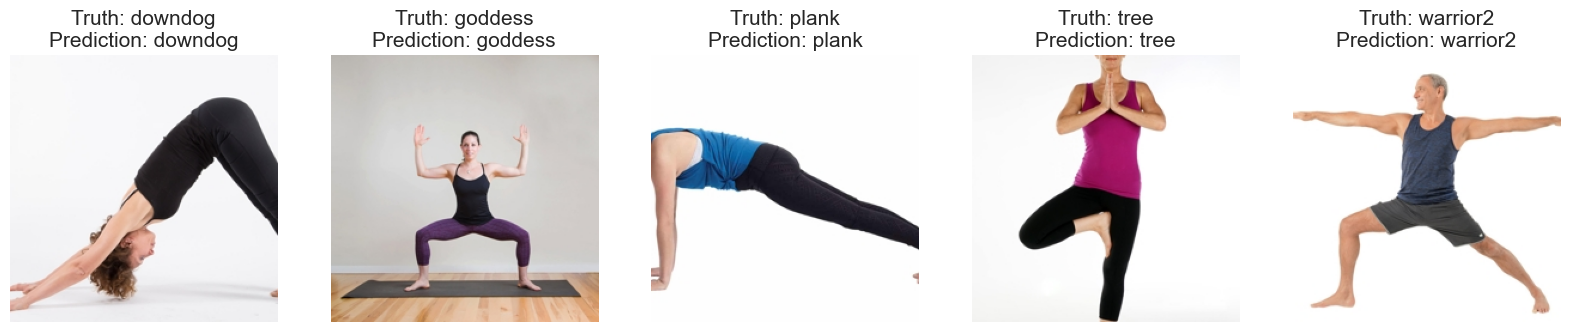

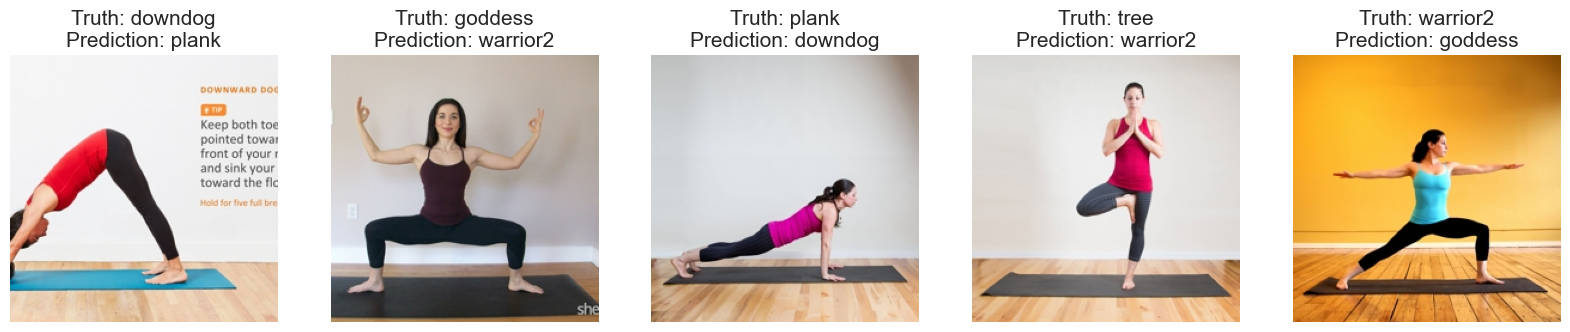

In [21]:
# plot correct and incorrect predictions
plot_correct_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))
plot_incorrect_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))

Interestingly, Version 0.0 and Version 1.0 incorrectly predicted the same 'goddess' image shown in the bottom row. It was predicted to be the 'warrior2' pose. This is strange since the image above in the top row is very similar, but it predicted correctly. 

Comparing the results of Version 0.0 and Version 1.0, it is clear that Version 1.0 produced better test results with a test accuracy of 73.50% compared to 63.62%. There still exists a gap between the training and validation accuracies for Version 1.0, however it is improved. In the case where training data is limited, it may be difficult to prevent overfitting entirely. However, the adjustments made to the model aid in improving the results without needing more data. 

#### Transfer Learning

The second section of this exploration involves using transfer learning to attempt to solve the classification problem. Transfer learning involves using a model that has previously been trained on a dataset instead of building a model from scratch - it is the reuse of a pre-trained model on a new problem. 

The pretrained model used in this section is called VGG16. It is a well-known CNN architecture which was used to win ILSVR Imagenet competition in 2014. The 16 in VGG16 refers to its 16 layers with weights. Similar to the models above, it has an input layer, hidden clayers and an output layer. For its hidden layers, it follows this arrangement of convolution and max pool layers consistently throughout the whole architecture as seen in the [image](https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918) below. A unique thing about VGG16 is that instead of having a large number of hyper-parameters, it is focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2.

![VGG16](../report/images/vgg16.png "VGG16 Structure")

In [23]:
num_classes= 5
BATCH_SIZE=32 
n_epochs = 5

Three Fully-Connected layers follow a stack of convolutional layers: the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer. The output layers of the pretrained VGG16 model has to be adjusted to coicincide with the 5 yoga pose classes. 


##### Adapt VGG16 to 5 class problem

In [24]:
# adapt output layer of Keras's VGG16 model
vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)

for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Note of structure of VGG16
The layers of the VGG16 CNN are visualised below. There are 5 convolution stages, the first 2 containing 2 convolution layers, there last 3 containing 3 convolution layers. Each convolution stage has a max pooling layer.

![VGG16 Layers](../report/images/vgg16_layers.jpg "VGG16 Layers")

##### Set up model for VGG16

In [4]:
train_generator = ImageDataGenerator()
traingen = train_generator.flow_from_directory(directory="../data/train",target_size=(224,224), shuffle=False, class_mode='categorical')
testgen = train_generator.flow_from_directory(directory="../data/test", target_size=(224,224),shuffle=False, class_mode='categorical')

Found 1540 images belonging to 5 classes.
Found 468 images belonging to 5 classes.


##### Train VGG16 using the Yoga Pose Dataset

In [5]:
training_steps_per_epoch = np.ceil(traingen.samples / BATCH_SIZE)
validation_steps_per_epoch = np.ceil(testgen.samples / BATCH_SIZE)
history = model.fit(traingen, steps_per_epoch = training_steps_per_epoch, validation_data=testgen, validation_steps=validation_steps_per_epoch,epochs=n_epochs, verbose=1)

Epoch 1/5


2022-11-06 17:31:23.249437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-06 17:31:23.537655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 11.7481 - accuracy: 0.6286

2022-11-06 17:32:01.437577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 50s 1s/step - loss: 11.7481 - accuracy: 0.6286 - val_loss: 0.9801 - val_accuracy: 0.9274
Epoch 2/5
49/49 [==============================] - 55s 1s/step - loss: 0.4062 - accuracy: 0.9675 - val_loss: 0.7614 - val_accuracy: 0.9423
Epoch 3/5
49/49 [==============================] - 64s 1s/step - loss: 0.1421 - accuracy: 0.9922 - val_loss: 0.6135 - val_accuracy: 0.9551
Epoch 4/5
49/49 [==============================] - 67s 1s/step - loss: 0.0951 - accuracy: 0.9955 - val_loss: 0.5012 - val_accuracy: 0.9637
Epoch 5/5
49/49 [==============================] - 65s 1s/step - loss: 0.0314 - accuracy: 0.9968 - val_loss: 0.5532 - val_accuracy: 0.9551


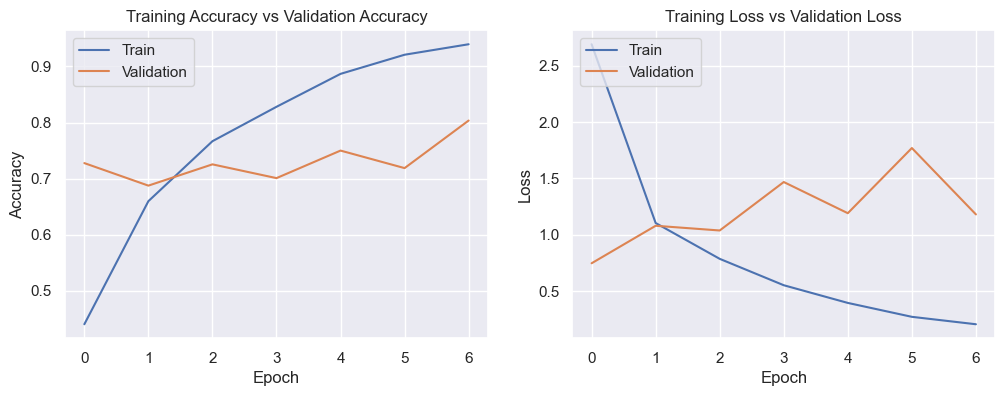

In [25]:
plot_history(history) # plot training accuracies and loss

##### Run VGG16 model on test data

In [28]:
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
filenames = testgen.filenames

predicted_classes = model.predict(testgen, testgen.samples / BATCH_SIZE)
predicted_classes = np.argmax(predicted_classes, axis=1)
true_classes = testgen.classes

15/15 [==============================] - 9s 613ms/step


##### Evaluate VGG16's Performance

In [29]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 95.51%


,Precision,Recall,F-Score,Support
tree,0.985507,0.985507,0.985507,69.0
downdog,0.989583,0.979381,0.984456,97.0
plank,0.956897,0.965217,0.961039,115.0
warrior2,0.979592,0.897196,0.936585,107.0
goddess,0.865169,0.962500,0.911243,80.0


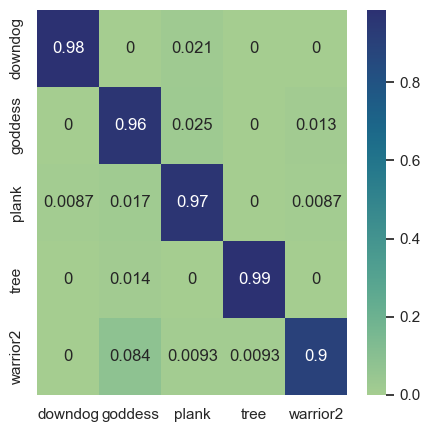

In [30]:
plot_confusion_matrix(true_classes, predicted_classes, class_indices.values())

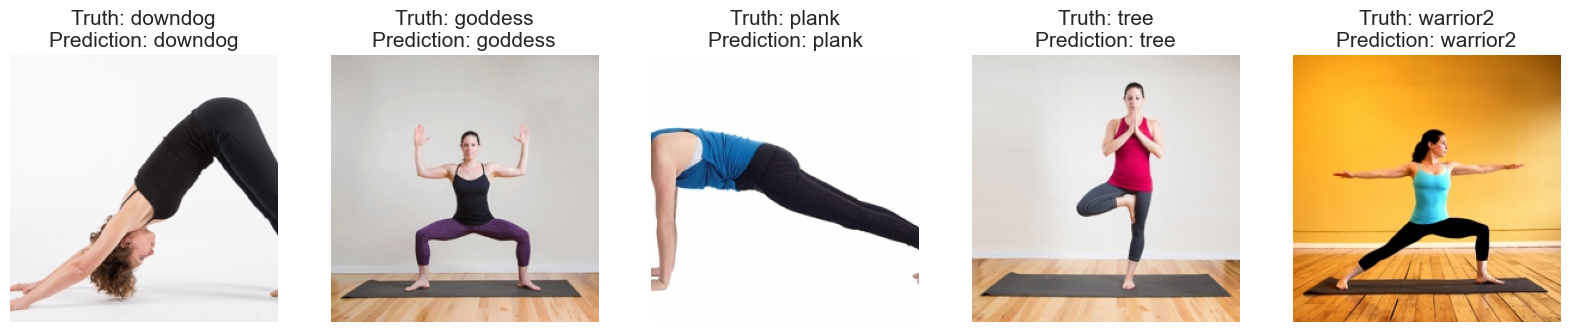

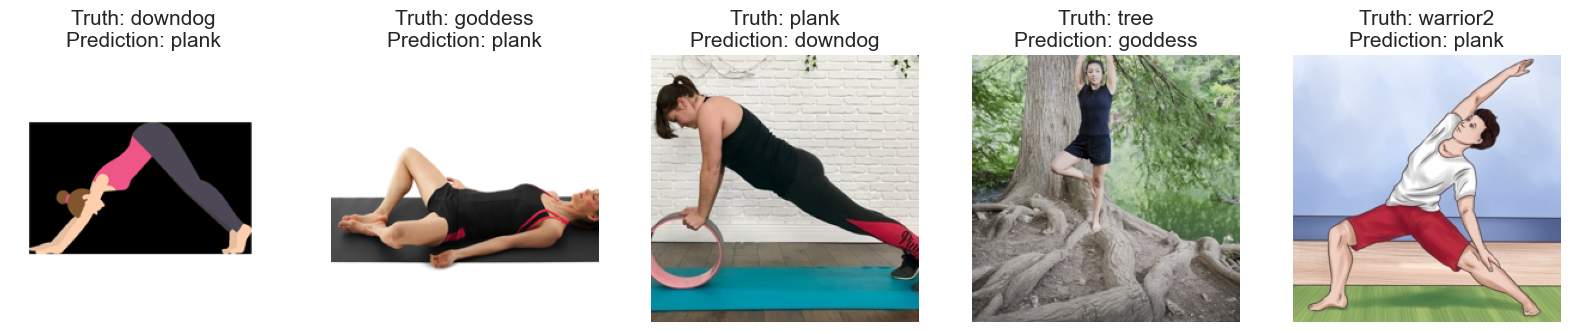

In [36]:
# plot correct and incorrect predictions
plot_correct_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))
plot_incorrect_predictions(predicted_classes, true_classes, filenames, list(class_indices.values()))

### Results*

#### Model Comparison
By comparing all the results generated by the three models, it is clear the transfer learning approach using VGG16 performed the best with a test accuracy of 95.51%. The best accuracy achieved when training a the model from scratch in Version 1.0 was 73.50%. The limitations imposed by using a dataset as small at the Yoga Poses dataset includes the tendency of the model to overfit the training data, despite taking precautions such as adding dropout layers and manipulating the current data. A model trained on a dataset of 1540 images is almost incomparable to one such as  VGG16 which was trained on over 14 million images. 


*Due to the layout of this notebook, it seemed applicable to include some of the result remarks and graphics in the methodology section to assist the flow of reading. 



#### Image classification
By looking at the correct and incorrect classifications generated by the models, it is difficult to determine which aspects of which poses the model struggle with. The pose that models Version 0.0 and Version 1.0 least accurately predict is the 'goddess' pose. 
For instance, with regards to the predictions of Version 0.0, the first three correct and incorrect predictions look very similar. In fact the correct and incorrect "goddess" pose images are the same image, where the one classified incorrectly is cropped closer. If those images are so similar, in terms of pose, person, clothing and colours, what makes causes them to be classified differently? One possible answer could be the orientation. Version 0.0 did not use the both flipped and non-flipped versions of the images (only the non-flipped) which is why the first two images may be classified incorreclty even though they are very similar to those above. 

Version 0.0 and Version 1.0 may not be the best approach when attempting to solve the classification approach based on their volatile predictions. The transfer learning approach, VGG16, seems more plausible with its accuracy of 95.51% with all classes having an accuracy of greater than 90%. VGG16 is not perfect as accuracies closer to 100% would be preferred, but it provides a foundation on which futher investigation can be done. Experimention with VGG16's parameters may produce better results. More so, ommitting VGG16 completely and using a different pretrained model such as Inception or ResNet may be beneficial. Alternatively, prior to making any adjustments to the model, one could make adjustments to the data. Aquiring a larger dataset for this problem may allow the models to reach the desired accuracy. This poses the question of what is the limitation of this solution - the model or the dataset?

Ultimately, to decide if the classification problem is solved depends on the user of the tool. If this were to be used in an application, 95.51% might be considered a high enough accuracy given that an instructor can change the label if predicted correctly. However, the point of the technology bases approach is to increase efficiency of use and not having a near to or 100% accuracy may hinder efficiency and have the opposite, undesired effect. 

### Bibliography 
 - Anandhuh (2021) *Image classification using CNN for Beginners*, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/anandhuh/image-classification-using-cnn-for-beginners/notebook (Accessed: November 6, 2022). 

 - arbazkhan971 (2022) *Image classification using CNN (94%+ accuracy)*, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/arbazkhan971/image-classification-using-cnn-94-accuracy/notebook (Accessed: November 6, 2022).

- Arora, A. (2020) *Image classification with VGG convolutional neural network using Keras for beginners*, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/image-classification-with-vgg-convolutional-neural-network-using-keras-for-beginners-61767950c5dd (Accessed: November 6, 2022). 

- Brownlee, J. (2019) *How to use the pre-trained VGG model to classify objects in photographs*, Machine Learning Mastery. Available at: https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/ (Accessed: November 6, 2022). 

 - Kadlaskar, A. (2021) *Image classification using CNN : Python implementation*, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/image-classification-using-convolutional-neural-network-with-python/ (Accessed: November 6, 2022). 
 
- Kothari, S. (2022) *Yoga pose classification using Deep Learning*, Yoga Pose Classification Using Deep Learning [Preprint]. Available at: https://doi.org/10.31979/etd.rkgu-pc9k. 

- McDermott, J. (no date) *Hands-on transfer learning with keras and the VGG16 model*, Learn Data Science - Tutorials, Books, Courses, and More. Available at: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/ (Accessed: November 6, 2022). 

 - McDermott, J. (2022), *Image classifier using CNN*, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/image-classifier-using-cnn/ (Accessed: November 6, 2022). 

- Mishra, M. (2020) *Convolutional neural networks, explained* , TowardsDataScience. Available at: https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939 (Accessed: November 6, 2022). 

- Pandit, N. (2020) *Yoga poses dataset*, Kaggle. Available at: https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset (Accessed: November 6, 2022). 

- saha, S. (2018) *A comprehensive guide to convolutional neural networks* TowardsDataScience. Available at: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 (Accessed: November 6, 2022). 

- Sanad, M. (2020) *CNN image classification: Image Classification using CNN*, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/ (Accessed: November 6, 2022).

- Zheng, R. (2020) *Beginners’ guide to image classification: VGG-19, resnet 50 and ...*, TowardsDataScience. Available at: https://towardsdatascience.com/beginners-guide-on-image-classification-vgg-19-resnet-50-and-inceptionresnetv2-with-tensorflow-4909c6478941 (Accessed: November 6, 2022). 